In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [2]:
data = pd.read_csv("../data/gold_price_data.csv")
print("✅ Dataset Loaded Successfully!")
data.head()

✅ Dataset Loaded Successfully!


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
print("\n📊 Dataset Info:")
print(data.info())


📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB
None


In [4]:
print("\nMissing Values:\n", data.isnull().sum())
data.dropna(inplace=True)


Missing Values:
 Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')


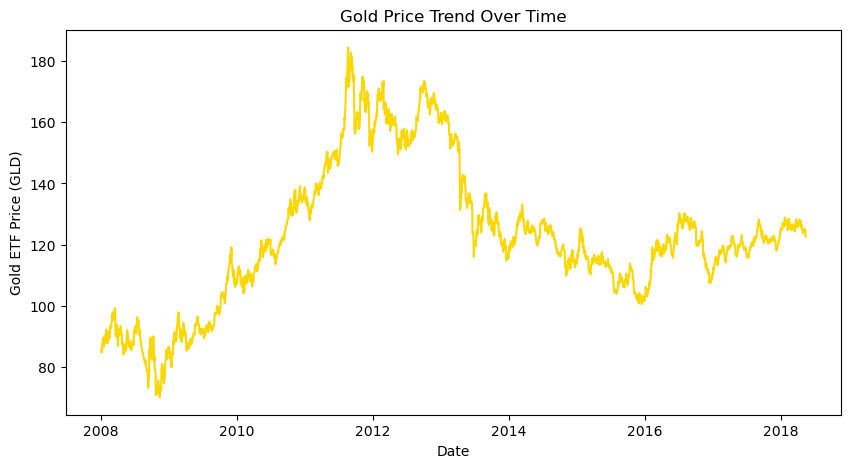

In [6]:
plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['GLD'], color='gold')
plt.title("Gold Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Gold ETF Price (GLD)")
plt.show()

C:\Users\athar\AppData\Local\Temp\ipykernel_18196\3924048270.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


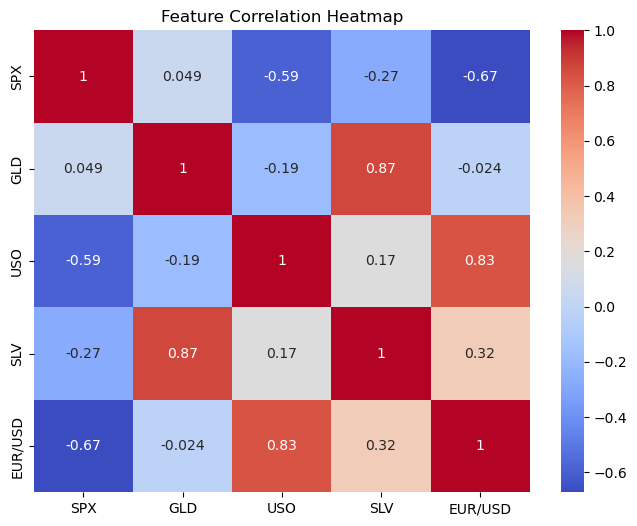

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
X = data[['SPX', 'USO', 'SLV', 'EUR/USD']]
y = data['GLD']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = lr.predict(X_test)



In [12]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [13]:
print("✅ Model Evaluation Metrics")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


✅ Model Evaluation Metrics
Mean Absolute Error (MAE): 5.696
Root Mean Squared Error (RMSE): 7.494
R² Score: 0.898


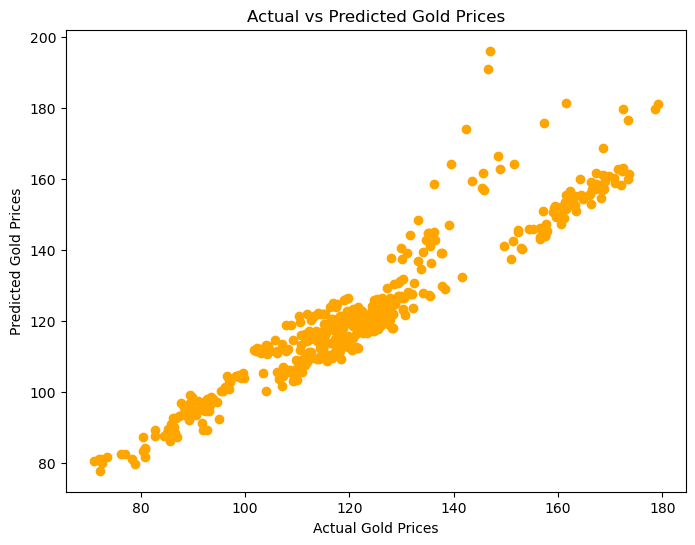

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='orange')
plt.xlabel("Actual Gold Prices")
plt.ylabel("Predicted Gold Prices")
plt.title("Actual vs Predicted Gold Prices")
plt.show()

In [15]:
with open("../models/linear_regression_model.pkl", "wb") as file:
    pickle.dump(lr, file)
print("✅ Model Saved Successfully (linear_regression_model.pkl)")

✅ Model Saved Successfully (linear_regression_model.pkl)


In [16]:
sample_input = np.array([[1500, 80, 15.5, 1.45]])  # [SPX, USO, SLV, EUR/USD]
predicted_price = lr.predict(sample_input)
print(f"\n💰 Predicted Gold Price for given inputs: {predicted_price[0]:.2f}")


💰 Predicted Gold Price for given inputs: 93.45


C:\Users\athar\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
